In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import sys
%matplotlib inline
sns.set()

In [244]:
data = loadmat('ex3data1.mat')
weights = loadmat('ex3weights.mat')
x = np.c_[np.ones((data['X'].shape[0],1)), data['X']]
y = data['y']
initialTheta = np.zeros(x.shape[1])
theta1 = np.array(weights['Theta1'])
theta2 = np.array(weights['Theta2'])

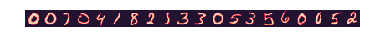

In [197]:
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [198]:
def gFunction(z):
    return 1 / (1 + np.exp(-z))

In [210]:
def regularizedCostFunction(theta, x, y, λ = 0.1):
    m = y.size
    h = gFunction(x.dot(theta))
    
    j = -1 * (1 / m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) + (λ / (2 * m)) * np.sum(np.square(theta[1:]))
    if np.isnan(j):
        return(np.inf)
    return(j)

In [256]:
def regularizedGradientDescent(theta, x, y, λ = 0.1):
    m = y.size
    h = gFunction(x.dot(theta.reshape(-1,1)))
    gradient = (1/m) * x.T.dot(h - y) + (λ / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
    return gradient.flatten()

In [257]:
print(regularizedCostFunction(initialTheta, x, y, 0.1).shape)
print(regularizedGradientDescent(initialTheta, x, y, 0.1).shape)

(1,)
(401,)


In [258]:
def oneVsAll(features, classes, numberOfClassifier, λ):
    train_theta = np.zeros((numberOfClassifier, x.shape[1]))
    for cls in range(1, numberOfClassifier + 1):
        optimum = sc.optimize.minimize(regularizedCostFunction, initialTheta, args = (x, (cls == y) * 1, 0.1), method = None,
        jac = regularizedGradientDescent, options = {'maxiter':50})
        train_theta[cls - 1] = optimum.x
    return train_theta

In [259]:
train_theta = oneVsAll(x, y, 10, 0.1)
train_theta.shape

(10, 401)

In [260]:
def prediction(theta, x):
    predict = gFunction(np.dot(x, theta.T))
    return np.argmax(predict, axis = 1) + 1

In [273]:
predict1 = prediction(train_theta, x)
print('The accuracy is {} %'.format(np.mean(predict1 == y.ravel()) * 100))

The accuracy is 93.24 %


In [274]:
def neuralNetworkPredict(theta1, theta2, x):
    z2 = np.dot(x, theta1.T)
    a2 = np.c_[np.ones(5000), gFunction(z2)]
    
    z3 = np.dot(a2, theta2.T)
    a3 = gFunction(z3)
    return a3

In [275]:
predict2 = np.argmax(neuralNetworkPredict(theta1, theta2, x), axis = 1) + 1
print('The accuracy is {} %'.format(np.mean(predict2 == y.ravel()) * 100))

The accuracy is 97.52 %
